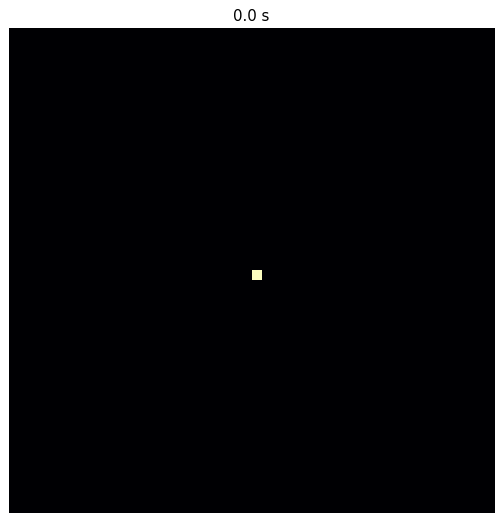

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

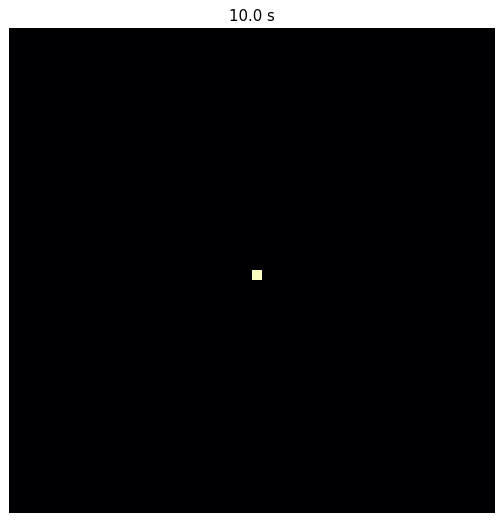

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

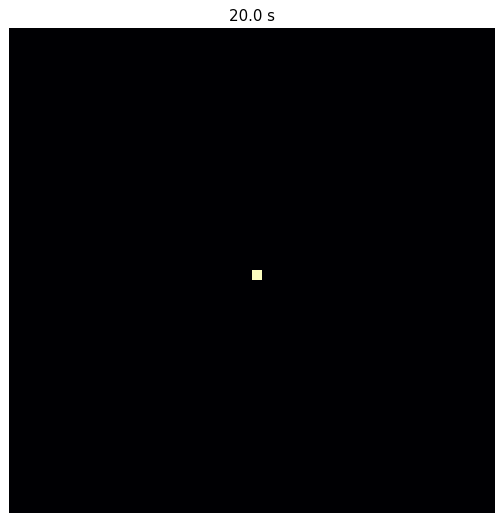

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

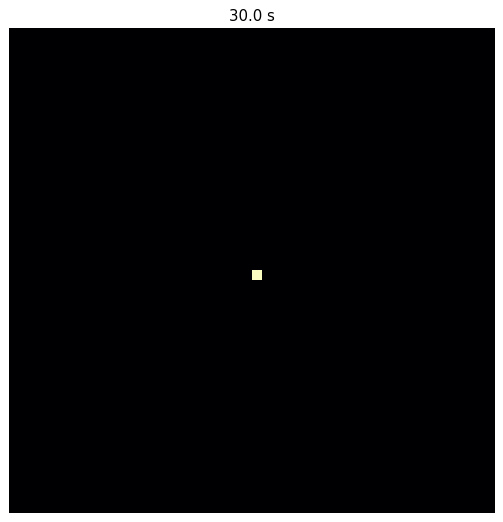

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

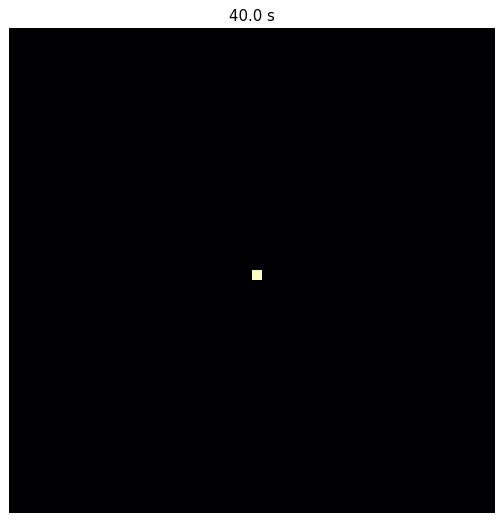

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

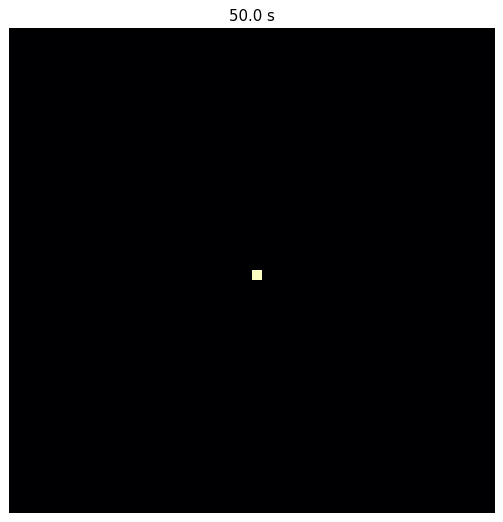

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

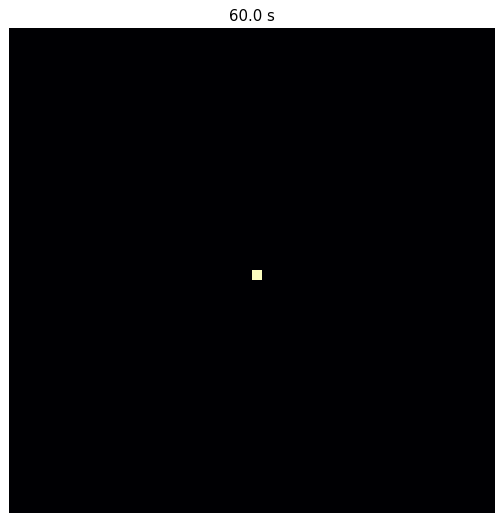

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

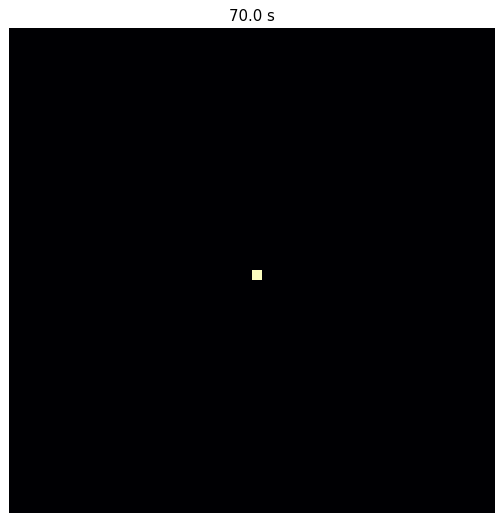

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

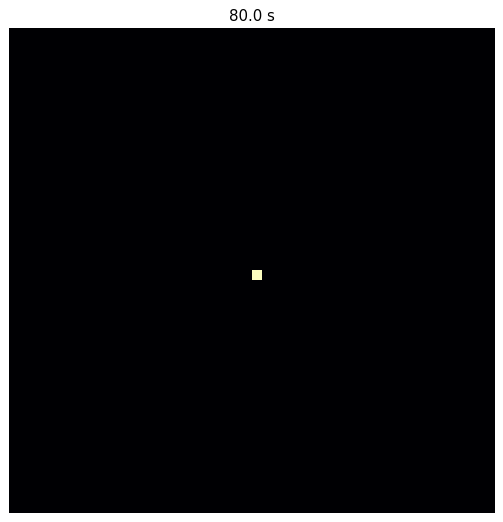

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

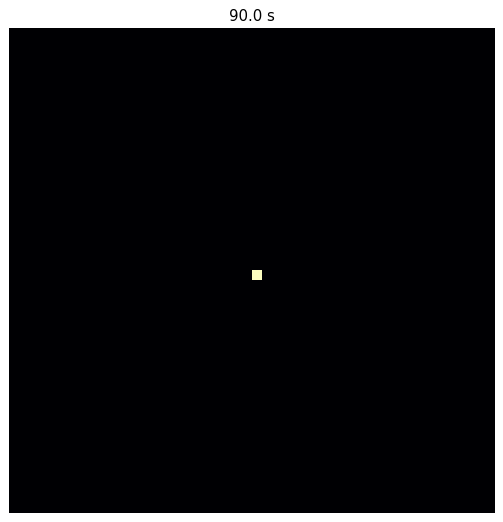

TypeError: difusao_2d() missing 4 required positional arguments: 'dy', 'dt', 'nt', and 'D'

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

<Figure size 720x630 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def difusao_2d(nx,ny,dy,dt,nt,D):

    # parametros
    nx = 50
    ny = 50
    dx = 1
    dy = 1

    # tempo e incremento de tempo
    nt = 100
    dt = 0.1

    # número de passos de tempo
    nsteps = 1000

    # condicoes de contorno
    u[0,:,:] = u[nx-1,:,:] = u[:,0,:] = u[:,ny-1,:] = 1
    
    
# concentracao 
u0 = np.ones((nx,ny))
u0[int(nx/2), int(ny/2)] = 2

for i in range(nt):
    u = np.copy(u0)



    for x in range(1, nx-1):
        for y in range(1, ny-1):
            u[x, y] = u0[x, y] + D * dt * (
                (u0[x+1, y] - 2 * u0[x, y] + u0[x-1, y]) / dx**2 
                + (u0[x, y+1] - 2 * u0[x, y] + u0[x, y-1]) / dy**2)

    u = np.copy(u0)
#    return u0,u 
    fig = plt.figure(figsize=(8,7),dpi=90)

    if i % 10 == 0:
        plt.imshow(u, cmap='magma')
        plt.axis('off')
        plt.title('{:.1f} s'.format(i))    
        fig.subplots_adjust(right=.8)
        plt.show()
# Run the diffusion model
difusao_2d(u0,u)

In [ ]:
    
# difusao em diferentes passos de tempo

#step = []
